In [1]:
import pandas as pd
import numpy as np
import sklearn
import mglearn
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import export_graphviz
from sklearn.linear_model import Ridge

In [2]:
data_temp=pd.read_csv("c:/Users/lkarpo/Desktop/dm8 sensor.csv")
data_crah=pd.read_csv("c:/Users/lkarpo/Desktop/dm8 crah.csv")

In [3]:
data_temp['t_stamp1']=data_temp['t_stamp'].str[:16]
data_crah['t_stamp1']=data_crah['t_stamp'].str[:16]
index1 = list(set(list(data_temp.t_stamp1) + list(data_crah.t_stamp1)))
index1.sort()
merged_df=pd.merge(left=data_temp, right=data_crah, how='inner', left_on='t_stamp1', right_on='t_stamp1')
trunc_df=merged_df.drop(columns=['v1_dm8_wireless_sensors_ndx','Temp1','t_stamp_x','Location_1','Temp_1','DewPT_1','TX_Time_1','Batt_Volts_1','RH_1','Relative_Humidity10','Relative_Humidity1','Relative_Humidity2','Relative_Humidity3',
                                'Relative_Humidity4','Relative_Humidity5','Relative_Humidity6','Drybulb_Temperature9','Drybulb_Temperature8','Drybulb_Temperature7','Drybulb_Temperature6','Relative_Humidity7','Relative_Humidity8',
                                'Drybulb_Temperature5', 'Relative_Humidity9','Drybulb_Temperature4','Drybulb_Temperature3','Drybulb_Temperature2','Drybulb_Temperature1','Dewpoint10','Drybulb_Temperature10','Dewpoint1','Dewpoint5','Dewpoint4',
                                'Dewpoint3','Dewpoint2','Dewpoint9','Dewpoint8','Dewpoint7','Dewpoint6','Dewpoint01','Dewpoint05','Dewpoint04','Dewpoint03','Dewpoint02','Drybulb_Temperature9','Relative_Humidity6',
                                'Relative_Humidity7','Drybulb_Temperature6','Relative_Humidity8','Drybulb_Temperature5','Relative_Humidity9','Drybulb_Temperature09','Drybulb_Temperature07','Drybulb_Temperature02','Drybulb_Temperature01',
                                'Drybulb_Temperature06','Drybulb_Temperature05','Drybulb_Temperature08','Drybulb_Temperature04','Drybulb_Temperature03','Relative_Humidity01','Relative_Humidity09','Relative_Humidity07','Relative_Humidity06','Relative_Humidity05',
                                'Relative_Humidity04','Relative_Humidity03','Relative_Humidity02','Dewpoint09','Dewpoint08','Dewpoint07','Dewpoint06','Relative_Humidity12','Relative_Humidity08','Relative_Humidity11','Relative_Humidity19','Relative_Humidity18','Drybulb_Temperature29',
                                'Relative_Humidity17','Relative_Humidity16','Relative_Humidity15','Relative_Humidity14','Relative_Humidity13','Drybulb_Temperature24','Drybulb_Temperature23','Drybulb_Temperature22','Drybulb_Temperature21','Drybulb_Temperature28','Drybulb_Temperature27',
                                'Drybulb_Temperature26','Drybulb_Temperature25','Drybulb_Temperature20','Drybulb_Temperature19','Drybulb_Temperature18','Drybulb_Temperature13','Drybulb_Temperature12','Drybulb_Temperature11','Drybulb_Temperature17','Drybulb_Temperature16','Drybulb_Temperature15',
                                'Drybulb_Temperature14','Relative_Humidity34','Relative_Humidity33','Relative_Humidity32','Relative_Humidity31','Relative_Humidity30','Relative_Humidity39','Relative_Humidity38','Relative_Humidity37','Relative_Humidity36','Relative_Humidity35','Drybulb_Temperature46','Drybulb_Temperature45','Drybulb_Temperature44','Drybulb_Temperature43',
                                'Drybulb_Temperature49','Drybulb_Temperature48','Drybulb_Temperature47','Drybulb_Temperature42','Drybulb_Temperature41','Drybulb_Temperature40','Drybulb_Temperature23','Relative_Humidity23','Relative_Humidity22','Relative_Humidity21','Relative_Humidity20','Relative_Humidity29','Relative_Humidity28','Relative_Humidity26','Relative_Humidity25',
                                'Relative_Humidity27','Relative_Humidity24','Drybulb_Temperature35','Drybulb_Temperature34','Drybulb_Temperature33','Drybulb_Temperature32','Drybulb_Temperature39','Drybulb_Temperature38','Drybulb_Temperature37','Drybulb_Temperature36','Drybulb_Temperature31','Drybulb_Temperature30','Relative_Humidity53','Relative_Humidity52','Relative_Humidity51',
                                'Relative_Humidity50','Relative_Humidity45','Relative_Humidity44','Relative_Humidity43','Relative_Humidity42','Relative_Humidity41','Relative_Humidity40','Relative_Humidity49','Relative_Humidity48','Relative_Humidity47','Relative_Humidity46','Drybulb_Temperature53','Drybulb_Temperature52','Drybulb_Temperature51','Drybulb_Temperature50','V1DM8_Drybulb_Temperature53',
                                'V1DM8_Relative_Humidity49','V1DM8_Drybulb_Temperature50','V1DM8_Drybulb_Temperature51','V1DM8_Drybulb_Temperature52','V1DM8_Relative_Humidity52','V1DM8_Drybulb_Temperature46','V1DM8_Relative_Humidity53','V1DM8_Drybulb_Temperature47','V1DM8_Drybulb_Temperature48','V1DM8_Drybulb_Temperature49','V1DM8_Relative_Humidity50','V1DM8_Relative_Humidity51','V1DM8_Drybulb_Temperature42','V1DM8_Drybulb_Temperature43',
                                'V1DM8_Drybulb_Temperature44','V1DM8_Drybulb_Temperature45','V1DM8_Drybulb_Temperature40','V1DM8_Drybulb_Temperature41','V1DM8_Drybulb_Temperature39','V1DM8_Drybulb_Temperature35','V1DM8_Drybulb_Temperature36','V1DM8_Drybulb_Temperature37','V1DM8_Drybulb_Temperature38','V1DM8_Dewpoint10','V1DM8_Relative_Humidity01','V1DM8_Relative_Humidity02','V1DM8_Relative_Humidity03','V1DM8_Relative_Humidity04','V1DM8_Relative_Humidity09',
                                'V1DM8_Drybulb_Temperature10','V1DM8_Drybulb_Temperature11','V1DM8_Drybulb_Temperature12','V1DM8_Relative_Humidity05','V1DM8_Relative_Humidity06','V1DM8_Relative_Humidity07','V1DM8_Relative_Humidity08','V1DM8_Drybulb_Temperature06','V1DM8_Relative_Humidity12','V1DM8_Drybulb_Temperature07','V1DM8_Relative_Humidity13','V1DM8_Drybulb_Temperature08','V1DM8_Relative_Humidity14','V1DM8_Drybulb_Temperature09','V1DM8_Relative_Humidity15','V1DM8_Drybulb_Temperature02','V1DM8_Drybulb_Temperature03',
                                'V1DM8_Drybulb_Temperature04','V1DM8_Relative_Humidity10','V1DM8_Drybulb_Temperature05','V1DM8_Relative_Humidity11','V1DM8_Drybulb_Temperature01','V1DM8_Relative_Humidity16','V1DM8_Relative_Humidity17','V1DM8_Relative_Humidity18','V1DM8_Relative_Humidity19','V1DM8_Dewpoint08','V1DM8_Relative_Humidity23','V1DM8_Relative_Humidity11','V1DM8_Relative_Humidity16','V1DM8_Drybulb_Temperature01','V1DM8_Dewpoint07','V1DM8_Relative_Humidity24','V1DM8_Relative_Humidity25','V1DM8_Dewpoint09','V1DM8_Relative_Humidity26',
                                'V1DM8_Dewpoint04','V1DM8_Dewpoint03','V1DM8_Relative_Humidity20','V1DM8_Dewpoint06','V1DM8_Relative_Humidity21','V1DM8_Dewpoint05','V1DM8_Relative_Humidity22','V1DM8_Dewpoint02','V1DM8_Dewpoint01','V1DM8_Drybulb_Temperature31','V1DM8_Drybulb_Temperature32','V1DM8_Drybulb_Temperature33','V1DM8_Drybulb_Temperature34','V1DM8_Relative_Humidity27','V1DM8_Relative_Humidity28','V1DM8_Relative_Humidity29','V1DM8_Drybulb_Temperature30','V1DM8_Relative_Humidity34','V1DM8_Drybulb_Temperature28','V1DM8_Relative_Humidity35',
                                'V1DM8_Drybulb_Temperature29','V1DM8_Relative_Humidity36','V1DM8_Relative_Humidity37','V1DM8_Relative_Humidity30','V1DM8_Drybulb_Temperature24','V1DM8_Relative_Humidity31','V1DM8_Drybulb_Temperature25','V1DM8_Relative_Humidity32','V1DM8_Drybulb_Temperature26','V1DM8_Relative_Humidity33','V1DM8_Drybulb_Temperature27','V1DM8_Drybulb_Temperature20','V1DM8_Drybulb_Temperature21','V1DM8_Drybulb_Temperature22','V1DM8_Drybulb_Temperature23','V1DM8_Relative_Humidity38','V1DM8_Relative_Humidity39','V1DM8_Relative_Humidity45',
                                'V1DM8_Drybulb_Temperature17','V1DM8_Relative_Humidity46','V1DM8_Drybulb_Temperature18','V1DM8_Relative_Humidity47','V1DM8_Drybulb_Temperature19','V1DM8_Relative_Humidity48','V1DM8_Relative_Humidity41','V1DM8_Drybulb_Temperature13','V1DM8_Relative_Humidity42','V1DM8_Drybulb_Temperature14','V1DM8_Relative_Humidity43','V1DM8_Drybulb_Temperature15','V1DM8_Relative_Humidity44','V1DM8_Drybulb_Temperature16','V1DM8_Relative_Humidity40','V1DM8_Drybulb_Temperature54','V1DM8_Relative_Humidity54','t_stamp_y','t_stamp1'])


In [4]:
trunc_df.fillna(0, inplace=True)
trunc_df.describe()

,DM8_E_Zone_Temp,DM8_E_Zone_RH,DM8_W_Zone_RH,DM8_W_Zone_Temp,V1DM8_Average_Temp_Aisle_A_B,V1DM8_Average_Humidity_Aisle_A_B,V1DM8_Average_Temp_Aisle_IDF,V1DM8_Average_Humidity_Aisle_IDF,V1DM8_Average_Temp_Aisle_C_D,V1DM8_Average_Humidity_Aisle_C_D,...,V1DM8_CRAH_16_CHWV_Position_Command,V1DM8_CRAH_16_CHWV_Position_Feedback,V1DM8_CRAH_17_CHWV_Position_Command,V1DM8_CRAH_17_CHWV_Position_Feedback,V1DM8_CRAH_17_Discharge_Air_Temp,V1DM8_CRAH_17_OAD_Position_Command,V1DM8_CRAH_17_OAD_Position_Feedback,V1DM8_CRAH_17_Return_Air_Temp,V1DM8_CRAH_17_RAD_Position_Command,V1DM8_CRAH_17_RAD_Position_Feedback
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,...,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,75.623596,39.325843,41.514607,73.932884,73.622923,41.151560,75.081275,39.168041,73.967578,40.718602,...,24.027829,23.496963,23.227656,23.005708,71.162453,41.626217,46.326829,83.096781,58.364045,57.200749
std,1.737739,7.267808,8.902751,0.570480,0.425515,8.609345,1.156670,7.218341,0.500204,8.465030,...,16.377141,15.913868,16.867274,16.430340,1.289383,40.343619,37.672402,9.515560,40.336934,41.157432
min,73.200000,29.000000,31.000000,72.600000,72.716700,31.333300,73.466700,29.000000,73.300000,31.000000,...,0.000000,0.333738,0.000000,0.485437,60.678700,0.000000,6.658520,66.936100,0.000000,0.000000
25%,74.300000,34.000000,34.000000,73.500000,73.350000,34.000000,74.200000,33.166700,73.566700,33.666700,...,0.151699,0.394417,0.000000,0.667476,70.039100,0.000000,7.941360,73.101700,26.000000,22.000000
50%,75.200000,36.000000,38.000000,74.100000,73.500000,38.166700,74.433300,36.166700,73.866700,37.333300,...,30.825200,30.006100,29.702700,29.217200,70.961900,53.000000,55.650600,84.872400,47.000000,44.000000
75%,77.000000,44.000000,47.000000,74.300000,73.866700,46.500000,76.366700,44.333300,74.216700,45.666700,...,38.546750,37.333150,38.652900,38.152300,72.038550,74.000000,78.252900,92.411800,100.000000,100.000000
max,80.600000,62.000000,66.000000,80.200000,75.616700,64.166700,77.683300,58.333300,76.333300,63.666700,...,43.598300,43.143200,44.205100,53.549800,76.279300,100.000000,99.969500,95.796800,100.000000,100.000000


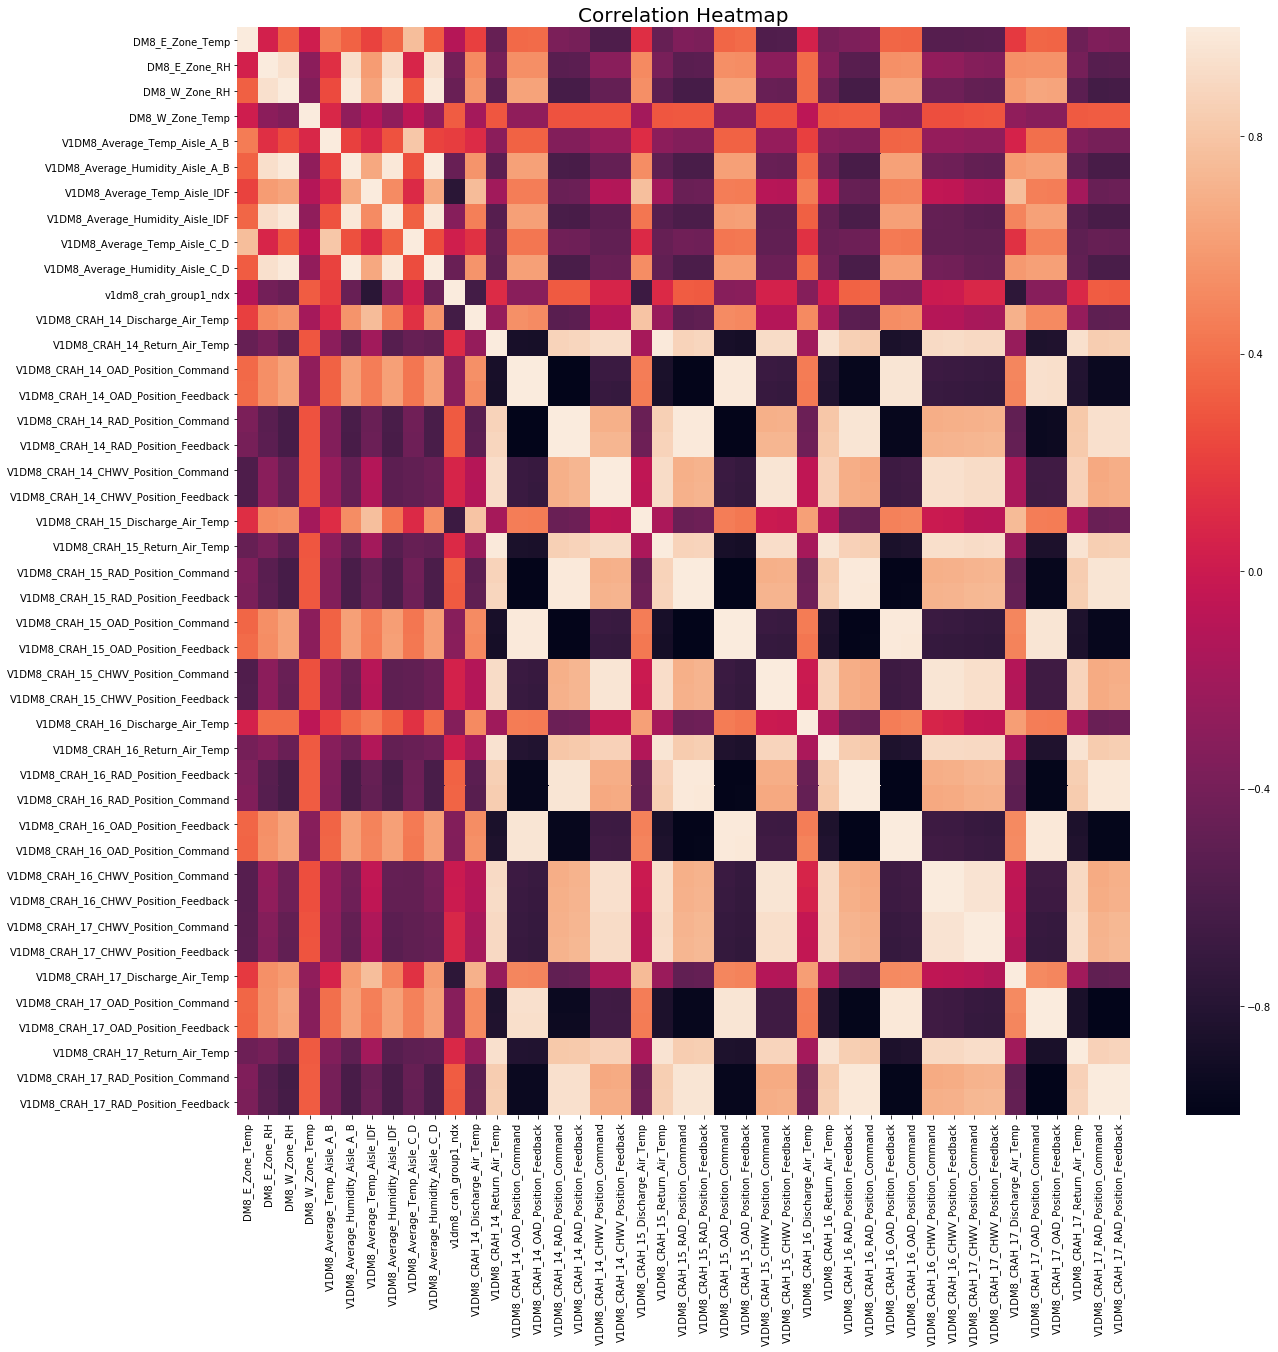

['DM8_E_Zone_Temp', 'DM8_E_Zone_RH', 'DM8_W_Zone_RH', 'DM8_W_Zone_Temp', 'V1DM8_Average_Temp_Aisle_A_B', 'V1DM8_Average_Humidity_Aisle_A_B', 'V1DM8_Average_Temp_Aisle_IDF', 'V1DM8_Average_Humidity_Aisle_IDF', 'V1DM8_Average_Temp_Aisle_C_D', 'V1DM8_Average_Humidity_Aisle_C_D', 'v1dm8_crah_group1_ndx', 'V1DM8_CRAH_14_Discharge_Air_Temp', 'V1DM8_CRAH_14_Return_Air_Temp', 'V1DM8_CRAH_14_OAD_Position_Command', 'V1DM8_CRAH_14_OAD_Position_Feedback', 'V1DM8_CRAH_14_RAD_Position_Command', 'V1DM8_CRAH_14_RAD_Position_Feedback', 'V1DM8_CRAH_14_CHWV_Position_Command', 'V1DM8_CRAH_14_CHWV_Position_Feedback', 'V1DM8_CRAH_15_Discharge_Air_Temp', 'V1DM8_CRAH_15_Return_Air_Temp', 'V1DM8_CRAH_15_RAD_Position_Command', 'V1DM8_CRAH_15_RAD_Position_Feedback', 'V1DM8_CRAH_15_OAD_Position_Command', 'V1DM8_CRAH_15_OAD_Position_Feedback', 'V1DM8_CRAH_15_CHWV_Position_Command', 'V1DM8_CRAH_15_CHWV_Position_Feedback', 'V1DM8_CRAH_16_Discharge_Air_Temp', 'V1DM8_CRAH_16_Return_Air_Temp', 'V1DM8_CRAH_16_RAD_Positi

In [5]:
trunc_df.corr()
plt.figure(figsize=(20,20))
ax=plt.axes()
corr=trunc_df.corr()
sns.heatmap(corr, ax=ax,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)
ax.set_title('Correlation Heatmap',fontsize=20)
plt.show()
trunc_df.describe()
feature_names=list(trunc_df.columns.values)
print(feature_names)

In [6]:
trunc_df_np=trunc_df.as_matrix()
trunc_df.dtypes

C:\Users\lkarpo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


DM8_E_Zone_Temp                         float64
DM8_E_Zone_RH                             int64
DM8_W_Zone_RH                             int64
DM8_W_Zone_Temp                         float64
V1DM8_Average_Temp_Aisle_A_B            float64
V1DM8_Average_Humidity_Aisle_A_B        float64
V1DM8_Average_Temp_Aisle_IDF            float64
V1DM8_Average_Humidity_Aisle_IDF        float64
V1DM8_Average_Temp_Aisle_C_D            float64
V1DM8_Average_Humidity_Aisle_C_D        float64
v1dm8_crah_group1_ndx                     int64
V1DM8_CRAH_14_Discharge_Air_Temp        float64
V1DM8_CRAH_14_Return_Air_Temp           float64
V1DM8_CRAH_14_OAD_Position_Command        int64
V1DM8_CRAH_14_OAD_Position_Feedback     float64
V1DM8_CRAH_14_RAD_Position_Command        int64
V1DM8_CRAH_14_RAD_Position_Feedback       int64
V1DM8_CRAH_14_CHWV_Position_Command     float64
V1DM8_CRAH_14_CHWV_Position_Feedback    float64
V1DM8_CRAH_15_Discharge_Air_Temp        float64
V1DM8_CRAH_15_Return_Air_Temp           

C:\Users\lkarpo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lkarpo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\lkarpo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


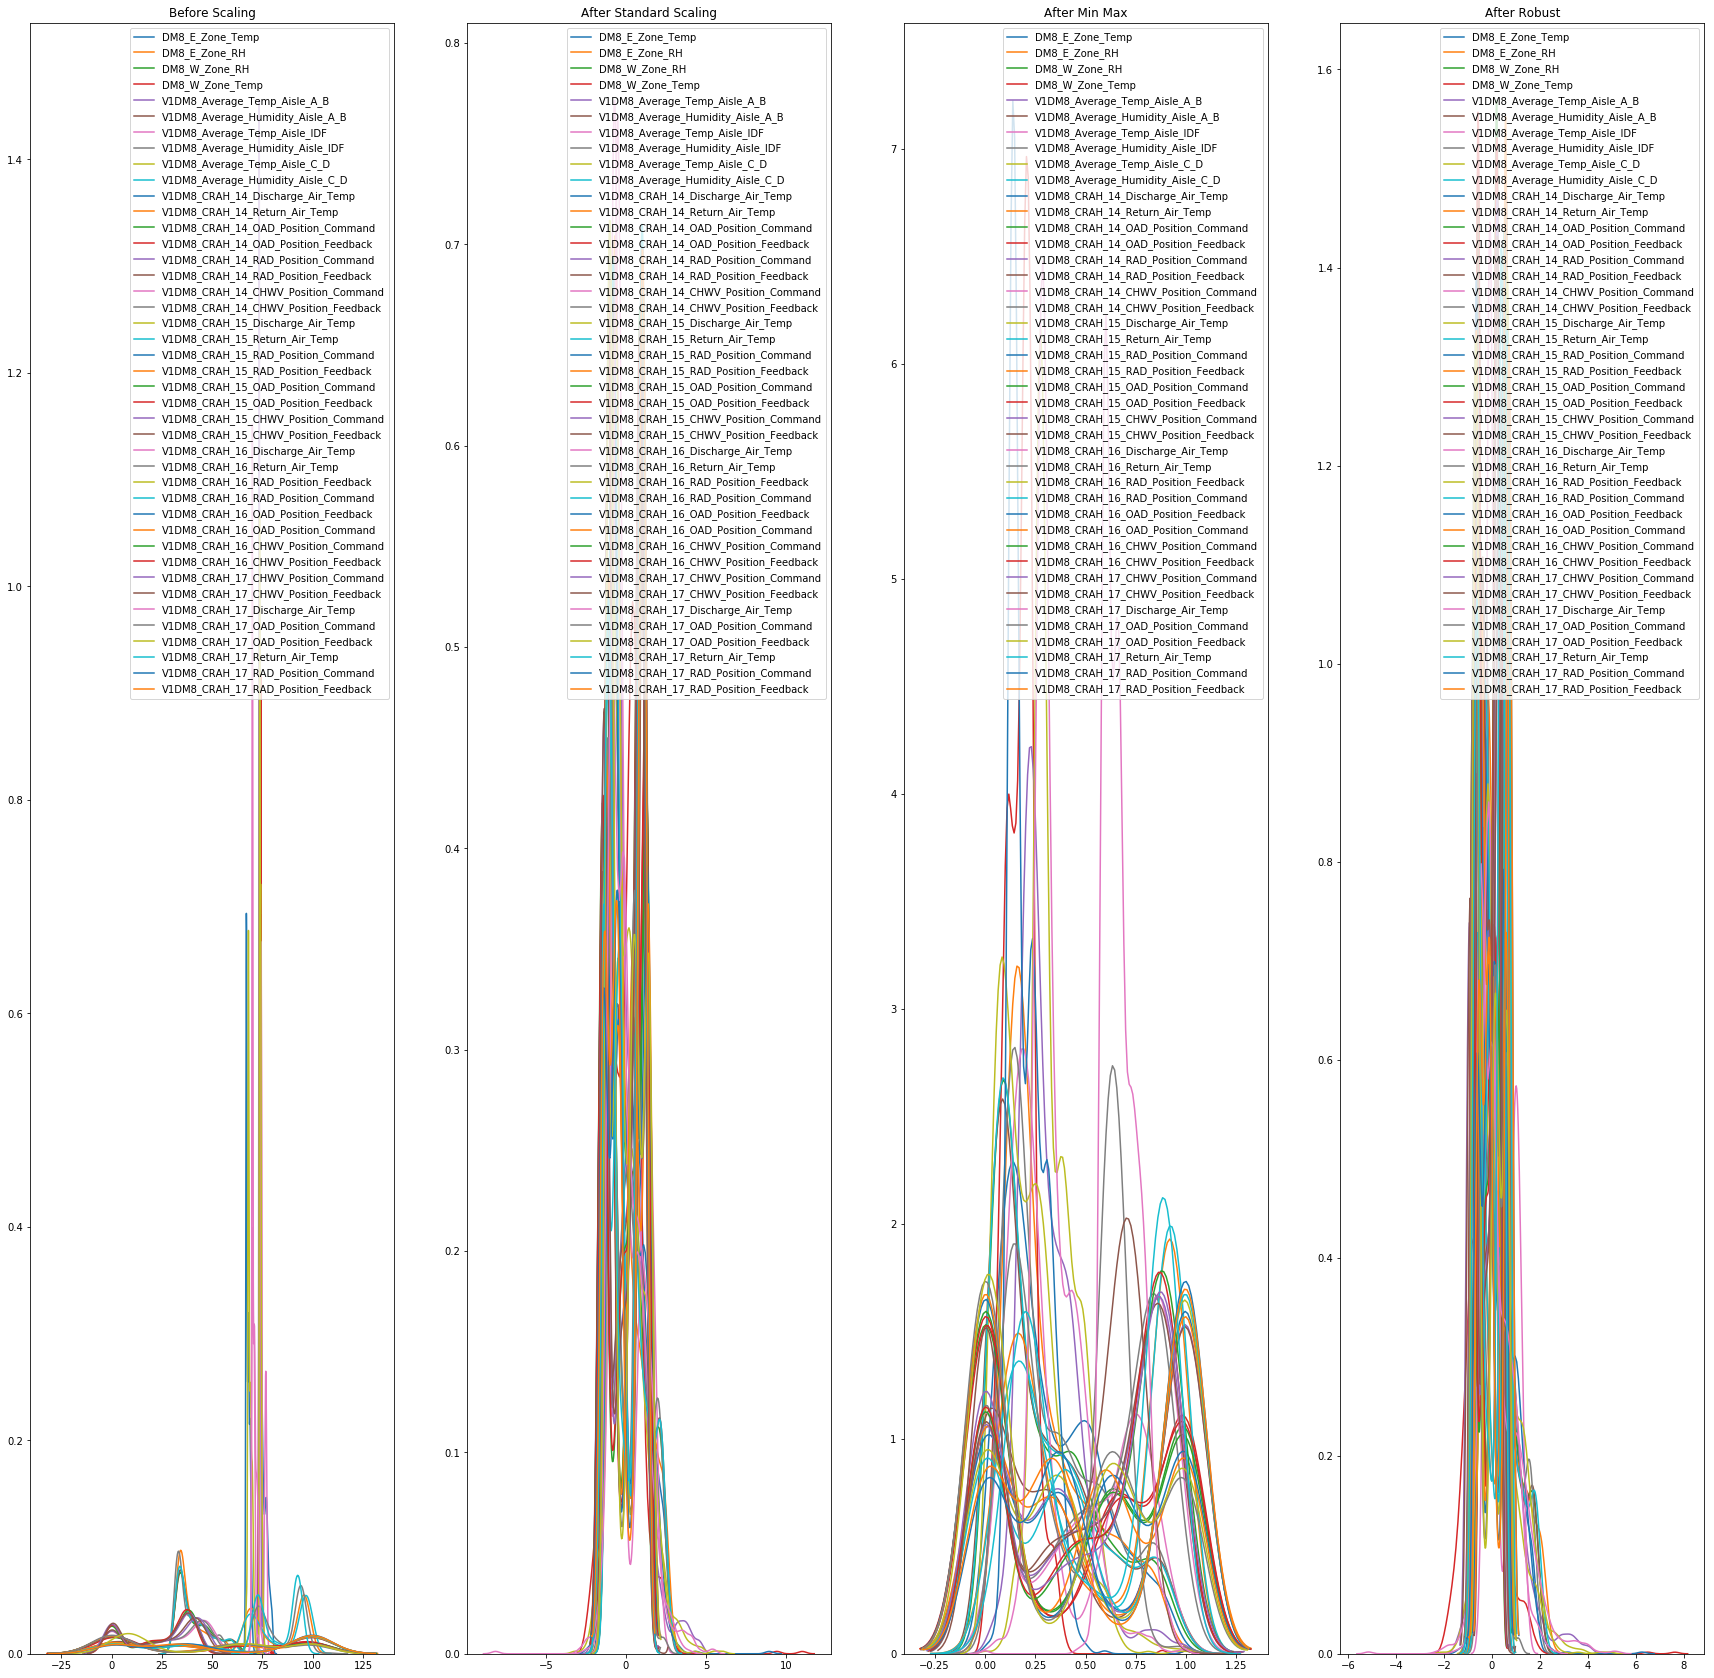

In [7]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(trunc_df)
s_scaled_df = pd.DataFrame(scaled_df, columns=['DM8_E_Zone_Temp', 'DM8_E_Zone_RH', 'DM8_W_Zone_RH', 'DM8_W_Zone_Temp', 'V1DM8_Average_Temp_Aisle_A_B', 'V1DM8_Average_Humidity_Aisle_A_B', 'V1DM8_Average_Temp_Aisle_IDF', 'V1DM8_Average_Humidity_Aisle_IDF', 'V1DM8_Average_Temp_Aisle_C_D', 'V1DM8_Average_Humidity_Aisle_C_D', 'v1dm8_crah_group1_ndx', 'V1DM8_CRAH_14_Discharge_Air_Temp', 'V1DM8_CRAH_14_Return_Air_Temp', 'V1DM8_CRAH_14_OAD_Position_Command', 'V1DM8_CRAH_14_OAD_Position_Feedback', 'V1DM8_CRAH_14_RAD_Position_Command', 'V1DM8_CRAH_14_RAD_Position_Feedback', 'V1DM8_CRAH_14_CHWV_Position_Command', 'V1DM8_CRAH_14_CHWV_Position_Feedback', 'V1DM8_CRAH_15_Discharge_Air_Temp', 'V1DM8_CRAH_15_Return_Air_Temp', 'V1DM8_CRAH_15_RAD_Position_Command', 'V1DM8_CRAH_15_RAD_Position_Feedback', 'V1DM8_CRAH_15_OAD_Position_Command', 'V1DM8_CRAH_15_OAD_Position_Feedback', 'V1DM8_CRAH_15_CHWV_Position_Command', 'V1DM8_CRAH_15_CHWV_Position_Feedback', 'V1DM8_CRAH_16_Discharge_Air_Temp', 'V1DM8_CRAH_16_Return_Air_Temp', 'V1DM8_CRAH_16_RAD_Position_Feedback', 'V1DM8_CRAH_16_RAD_Position_Command', 'V1DM8_CRAH_16_OAD_Position_Feedback', 'V1DM8_CRAH_16_OAD_Position_Command', 'V1DM8_CRAH_16_CHWV_Position_Command', 'V1DM8_CRAH_16_CHWV_Position_Feedback', 'V1DM8_CRAH_17_CHWV_Position_Command', 'V1DM8_CRAH_17_CHWV_Position_Feedback', 'V1DM8_CRAH_17_Discharge_Air_Temp', 'V1DM8_CRAH_17_OAD_Position_Command', 'V1DM8_CRAH_17_OAD_Position_Feedback', 'V1DM8_CRAH_17_Return_Air_Temp', 'V1DM8_CRAH_17_RAD_Position_Command', 'V1DM8_CRAH_17_RAD_Position_Feedback'])
mm_scaler = preprocessing.MinMaxScaler()
mm_scaled_df = mm_scaler.fit_transform(trunc_df)
MinMax_scaled_df = pd.DataFrame(mm_scaled_df, columns=['DM8_E_Zone_Temp', 'DM8_E_Zone_RH', 'DM8_W_Zone_RH', 'DM8_W_Zone_Temp', 'V1DM8_Average_Temp_Aisle_A_B', 'V1DM8_Average_Humidity_Aisle_A_B', 'V1DM8_Average_Temp_Aisle_IDF', 'V1DM8_Average_Humidity_Aisle_IDF', 'V1DM8_Average_Temp_Aisle_C_D', 'V1DM8_Average_Humidity_Aisle_C_D', 'v1dm8_crah_group1_ndx', 'V1DM8_CRAH_14_Discharge_Air_Temp', 'V1DM8_CRAH_14_Return_Air_Temp', 'V1DM8_CRAH_14_OAD_Position_Command', 'V1DM8_CRAH_14_OAD_Position_Feedback', 'V1DM8_CRAH_14_RAD_Position_Command', 'V1DM8_CRAH_14_RAD_Position_Feedback', 'V1DM8_CRAH_14_CHWV_Position_Command', 'V1DM8_CRAH_14_CHWV_Position_Feedback', 'V1DM8_CRAH_15_Discharge_Air_Temp', 'V1DM8_CRAH_15_Return_Air_Temp', 'V1DM8_CRAH_15_RAD_Position_Command', 'V1DM8_CRAH_15_RAD_Position_Feedback', 'V1DM8_CRAH_15_OAD_Position_Command', 'V1DM8_CRAH_15_OAD_Position_Feedback', 'V1DM8_CRAH_15_CHWV_Position_Command', 'V1DM8_CRAH_15_CHWV_Position_Feedback', 'V1DM8_CRAH_16_Discharge_Air_Temp', 'V1DM8_CRAH_16_Return_Air_Temp', 'V1DM8_CRAH_16_RAD_Position_Feedback', 'V1DM8_CRAH_16_RAD_Position_Command', 'V1DM8_CRAH_16_OAD_Position_Feedback', 'V1DM8_CRAH_16_OAD_Position_Command', 'V1DM8_CRAH_16_CHWV_Position_Command', 'V1DM8_CRAH_16_CHWV_Position_Feedback', 'V1DM8_CRAH_17_CHWV_Position_Command', 'V1DM8_CRAH_17_CHWV_Position_Feedback', 'V1DM8_CRAH_17_Discharge_Air_Temp', 'V1DM8_CRAH_17_OAD_Position_Command', 'V1DM8_CRAH_17_OAD_Position_Feedback', 'V1DM8_CRAH_17_Return_Air_Temp', 'V1DM8_CRAH_17_RAD_Position_Command', 'V1DM8_CRAH_17_RAD_Position_Feedback'])
r_scaler = preprocessing.RobustScaler()
r_scaled = r_scaler.fit_transform(trunc_df)
r_scaled_df = pd.DataFrame(r_scaled, columns=['DM8_E_Zone_Temp', 'DM8_E_Zone_RH', 'DM8_W_Zone_RH', 'DM8_W_Zone_Temp', 'V1DM8_Average_Temp_Aisle_A_B', 'V1DM8_Average_Humidity_Aisle_A_B', 'V1DM8_Average_Temp_Aisle_IDF', 'V1DM8_Average_Humidity_Aisle_IDF', 'V1DM8_Average_Temp_Aisle_C_D', 'V1DM8_Average_Humidity_Aisle_C_D', 'v1dm8_crah_group1_ndx', 'V1DM8_CRAH_14_Discharge_Air_Temp', 'V1DM8_CRAH_14_Return_Air_Temp', 'V1DM8_CRAH_14_OAD_Position_Command', 'V1DM8_CRAH_14_OAD_Position_Feedback', 'V1DM8_CRAH_14_RAD_Position_Command', 'V1DM8_CRAH_14_RAD_Position_Feedback', 'V1DM8_CRAH_14_CHWV_Position_Command', 'V1DM8_CRAH_14_CHWV_Position_Feedback', 'V1DM8_CRAH_15_Discharge_Air_Temp', 'V1DM8_CRAH_15_Return_Air_Temp', 'V1DM8_CRAH_15_RAD_Position_Command', 'V1DM8_CRAH_15_RAD_Position_Feedback', 'V1DM8_CRAH_15_OAD_Position_Command', 'V1DM8_CRAH_15_OAD_Position_Feedback', 'V1DM8_CRAH_15_CHWV_Position_Command', 'V1DM8_CRAH_15_CHWV_Position_Feedback', 'V1DM8_CRAH_16_Discharge_Air_Temp', 'V1DM8_CRAH_16_Return_Air_Temp', 'V1DM8_CRAH_16_RAD_Position_Feedback', 'V1DM8_CRAH_16_RAD_Position_Command', 'V1DM8_CRAH_16_OAD_Position_Feedback', 'V1DM8_CRAH_16_OAD_Position_Command', 'V1DM8_CRAH_16_CHWV_Position_Command', 'V1DM8_CRAH_16_CHWV_Position_Feedback', 'V1DM8_CRAH_17_CHWV_Position_Command', 'V1DM8_CRAH_17_CHWV_Position_Feedback', 'V1DM8_CRAH_17_Discharge_Air_Temp', 'V1DM8_CRAH_17_OAD_Position_Command', 'V1DM8_CRAH_17_OAD_Position_Feedback', 'V1DM8_CRAH_17_Return_Air_Temp', 'V1DM8_CRAH_17_RAD_Position_Command', 'V1DM8_CRAH_17_RAD_Position_Feedback'])

fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4, figsize=(30,30))
ax1.set_title("Before Scaling")
sns.kdeplot(trunc_df['DM8_E_Zone_Temp'], ax=ax1)
sns.kdeplot(trunc_df['DM8_E_Zone_RH'], ax=ax1)
sns.kdeplot(trunc_df['DM8_W_Zone_RH'], ax=ax1)
sns.kdeplot(trunc_df['DM8_W_Zone_Temp'], ax=ax1)
sns.kdeplot(trunc_df['V1DM8_Average_Temp_Aisle_A_B'], ax=ax1)
sns.kdeplot(trunc_df['V1DM8_Average_Humidity_Aisle_A_B'], ax=ax1)
sns.kdeplot(trunc_df['V1DM8_Average_Temp_Aisle_IDF'], ax=ax1)
sns.kdeplot(trunc_df['V1DM8_Average_Humidity_Aisle_IDF'], ax=ax1)
sns.kdeplot(trunc_df['V1DM8_Average_Temp_Aisle_C_D'], ax=ax1)
sns.kdeplot(trunc_df['V1DM8_Average_Humidity_Aisle_C_D'], ax=ax1)
sns.kdeplot(trunc_df['V1DM8_CRAH_14_Discharge_Air_Temp'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_14_Return_Air_Temp'], ax=ax1)
sns.kdeplot(trunc_df['V1DM8_CRAH_14_OAD_Position_Command'], ax=ax1)
sns.kdeplot(trunc_df['V1DM8_CRAH_14_OAD_Position_Feedback'], ax=ax1)
sns.kdeplot(trunc_df['V1DM8_CRAH_14_RAD_Position_Command'], ax=ax1)
sns.kdeplot(trunc_df['V1DM8_CRAH_14_RAD_Position_Feedback'], ax=ax1)
sns.kdeplot(trunc_df['V1DM8_CRAH_14_CHWV_Position_Command'], ax=ax1)
sns.kdeplot(trunc_df['V1DM8_CRAH_14_CHWV_Position_Feedback'], ax=ax1)
sns.kdeplot(trunc_df['V1DM8_CRAH_15_Discharge_Air_Temp'], ax=ax1)
sns.kdeplot(trunc_df['V1DM8_CRAH_15_Return_Air_Temp'], ax=ax1)
sns.kdeplot(trunc_df['V1DM8_CRAH_15_RAD_Position_Command'], ax=ax1)
sns.kdeplot(trunc_df['V1DM8_CRAH_15_RAD_Position_Feedback'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_15_OAD_Position_Command'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_15_OAD_Position_Feedback'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_15_CHWV_Position_Command'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_15_CHWV_Position_Feedback'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_16_Discharge_Air_Temp'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_16_Return_Air_Temp'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_16_RAD_Position_Feedback'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_16_RAD_Position_Command'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_16_OAD_Position_Feedback'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_16_OAD_Position_Command'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_16_CHWV_Position_Command'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_16_CHWV_Position_Feedback'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_17_CHWV_Position_Command'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_17_CHWV_Position_Feedback'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_17_Discharge_Air_Temp'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_17_OAD_Position_Command'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_17_OAD_Position_Feedback'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_17_Return_Air_Temp'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_17_RAD_Position_Command'], ax=ax1) 
sns.kdeplot(trunc_df['V1DM8_CRAH_17_RAD_Position_Feedback'], ax=ax1)
ax2.set_title("After Standard Scaling")
sns.kdeplot(s_scaled_df['DM8_E_Zone_Temp'], ax=ax2)
sns.kdeplot(s_scaled_df['DM8_E_Zone_RH'], ax=ax2)
sns.kdeplot(s_scaled_df['DM8_W_Zone_RH'], ax=ax2)
sns.kdeplot(s_scaled_df['DM8_W_Zone_Temp'], ax=ax2)
sns.kdeplot(s_scaled_df['V1DM8_Average_Temp_Aisle_A_B'], ax=ax2)
sns.kdeplot(s_scaled_df['V1DM8_Average_Humidity_Aisle_A_B'], ax=ax2)
sns.kdeplot(s_scaled_df['V1DM8_Average_Temp_Aisle_IDF'], ax=ax2)
sns.kdeplot(s_scaled_df['V1DM8_Average_Humidity_Aisle_IDF'], ax=ax2)
sns.kdeplot(s_scaled_df['V1DM8_Average_Temp_Aisle_C_D'], ax=ax2)
sns.kdeplot(s_scaled_df['V1DM8_Average_Humidity_Aisle_C_D'], ax=ax2)
sns.kdeplot(s_scaled_df['V1DM8_CRAH_14_Discharge_Air_Temp'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_14_Return_Air_Temp'], ax=ax2)
sns.kdeplot(s_scaled_df['V1DM8_CRAH_14_OAD_Position_Command'], ax=ax2)
sns.kdeplot(s_scaled_df['V1DM8_CRAH_14_OAD_Position_Feedback'], ax=ax2)
sns.kdeplot(s_scaled_df['V1DM8_CRAH_14_RAD_Position_Command'], ax=ax2)
sns.kdeplot(s_scaled_df['V1DM8_CRAH_14_RAD_Position_Feedback'], ax=ax2)
sns.kdeplot(s_scaled_df['V1DM8_CRAH_14_CHWV_Position_Command'], ax=ax2)
sns.kdeplot(s_scaled_df['V1DM8_CRAH_14_CHWV_Position_Feedback'], ax=ax2)
sns.kdeplot(s_scaled_df['V1DM8_CRAH_15_Discharge_Air_Temp'], ax=ax2)
sns.kdeplot(s_scaled_df['V1DM8_CRAH_15_Return_Air_Temp'], ax=ax2)
sns.kdeplot(s_scaled_df['V1DM8_CRAH_15_RAD_Position_Command'], ax=ax2)
sns.kdeplot(s_scaled_df['V1DM8_CRAH_15_RAD_Position_Feedback'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_15_OAD_Position_Command'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_15_OAD_Position_Feedback'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_15_CHWV_Position_Command'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_15_CHWV_Position_Feedback'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_16_Discharge_Air_Temp'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_16_Return_Air_Temp'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_16_RAD_Position_Feedback'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_16_RAD_Position_Command'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_16_OAD_Position_Feedback'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_16_OAD_Position_Command'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_16_CHWV_Position_Command'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_16_CHWV_Position_Feedback'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_17_CHWV_Position_Command'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_17_CHWV_Position_Feedback'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_17_Discharge_Air_Temp'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_17_OAD_Position_Command'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_17_OAD_Position_Feedback'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_17_Return_Air_Temp'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_17_RAD_Position_Command'], ax=ax2) 
sns.kdeplot(s_scaled_df['V1DM8_CRAH_17_RAD_Position_Feedback'], ax=ax2)
ax3.set_title("After Min Max")
sns.kdeplot(MinMax_scaled_df['DM8_E_Zone_Temp'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['DM8_E_Zone_RH'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['DM8_W_Zone_RH'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['DM8_W_Zone_Temp'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['V1DM8_Average_Temp_Aisle_A_B'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['V1DM8_Average_Humidity_Aisle_A_B'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['V1DM8_Average_Temp_Aisle_IDF'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['V1DM8_Average_Humidity_Aisle_IDF'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['V1DM8_Average_Temp_Aisle_C_D'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['V1DM8_Average_Humidity_Aisle_C_D'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_14_Discharge_Air_Temp'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_14_Return_Air_Temp'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_14_OAD_Position_Command'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_14_OAD_Position_Feedback'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_14_RAD_Position_Command'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_14_RAD_Position_Feedback'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_14_CHWV_Position_Command'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_14_CHWV_Position_Feedback'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_15_Discharge_Air_Temp'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_15_Return_Air_Temp'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_15_RAD_Position_Command'], ax=ax3)
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_15_RAD_Position_Feedback'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_15_OAD_Position_Command'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_15_OAD_Position_Feedback'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_15_CHWV_Position_Command'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_15_CHWV_Position_Feedback'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_16_Discharge_Air_Temp'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_16_Return_Air_Temp'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_16_RAD_Position_Feedback'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_16_RAD_Position_Command'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_16_OAD_Position_Feedback'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_16_OAD_Position_Command'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_16_CHWV_Position_Command'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_16_CHWV_Position_Feedback'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_17_CHWV_Position_Command'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_17_CHWV_Position_Feedback'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_17_Discharge_Air_Temp'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_17_OAD_Position_Command'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_17_OAD_Position_Feedback'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_17_Return_Air_Temp'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_17_RAD_Position_Command'], ax=ax3) 
sns.kdeplot(MinMax_scaled_df['V1DM8_CRAH_17_RAD_Position_Feedback'], ax=ax3)
ax4.set_title("After Robust")
sns.kdeplot(r_scaled_df['DM8_E_Zone_Temp'], ax=ax4)
sns.kdeplot(r_scaled_df['DM8_E_Zone_RH'], ax=ax4)
sns.kdeplot(r_scaled_df['DM8_W_Zone_RH'], ax=ax4)
sns.kdeplot(r_scaled_df['DM8_W_Zone_Temp'], ax=ax4)
sns.kdeplot(r_scaled_df['V1DM8_Average_Temp_Aisle_A_B'], ax=ax4)
sns.kdeplot(r_scaled_df['V1DM8_Average_Humidity_Aisle_A_B'], ax=ax4)
sns.kdeplot(r_scaled_df['V1DM8_Average_Temp_Aisle_IDF'], ax=ax4)
sns.kdeplot(r_scaled_df['V1DM8_Average_Humidity_Aisle_IDF'], ax=ax4)
sns.kdeplot(r_scaled_df['V1DM8_Average_Temp_Aisle_C_D'], ax=ax4)
sns.kdeplot(r_scaled_df['V1DM8_Average_Humidity_Aisle_C_D'], ax=ax4)
sns.kdeplot(r_scaled_df['V1DM8_CRAH_14_Discharge_Air_Temp'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_14_Return_Air_Temp'], ax=ax4)
sns.kdeplot(r_scaled_df['V1DM8_CRAH_14_OAD_Position_Command'], ax=ax4)
sns.kdeplot(r_scaled_df['V1DM8_CRAH_14_OAD_Position_Feedback'], ax=ax4)
sns.kdeplot(r_scaled_df['V1DM8_CRAH_14_RAD_Position_Command'], ax=ax4)
sns.kdeplot(r_scaled_df['V1DM8_CRAH_14_RAD_Position_Feedback'], ax=ax4)
sns.kdeplot(r_scaled_df['V1DM8_CRAH_14_CHWV_Position_Command'], ax=ax4)
sns.kdeplot(r_scaled_df['V1DM8_CRAH_14_CHWV_Position_Feedback'], ax=ax4)
sns.kdeplot(r_scaled_df['V1DM8_CRAH_15_Discharge_Air_Temp'], ax=ax4)
sns.kdeplot(r_scaled_df['V1DM8_CRAH_15_Return_Air_Temp'], ax=ax4)
sns.kdeplot(r_scaled_df['V1DM8_CRAH_15_RAD_Position_Command'], ax=ax4)
sns.kdeplot(r_scaled_df['V1DM8_CRAH_15_RAD_Position_Feedback'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_15_OAD_Position_Command'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_15_OAD_Position_Feedback'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_15_CHWV_Position_Command'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_15_CHWV_Position_Feedback'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_16_Discharge_Air_Temp'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_16_Return_Air_Temp'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_16_RAD_Position_Feedback'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_16_RAD_Position_Command'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_16_OAD_Position_Feedback'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_16_OAD_Position_Command'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_16_CHWV_Position_Command'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_16_CHWV_Position_Feedback'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_17_CHWV_Position_Command'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_17_CHWV_Position_Feedback'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_17_Discharge_Air_Temp'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_17_OAD_Position_Command'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_17_OAD_Position_Feedback'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_17_Return_Air_Temp'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_17_RAD_Position_Command'], ax=ax4) 
sns.kdeplot(r_scaled_df['V1DM8_CRAH_17_RAD_Position_Feedback'], ax=ax4)

In [8]:

x=s_scaled_df[['DM8_E_Zone_Temp', 'DM8_E_Zone_RH', 'DM8_W_Zone_RH', 'DM8_W_Zone_Temp', 'V1DM8_Average_Temp_Aisle_A_B', 'V1DM8_Average_Humidity_Aisle_A_B', 'V1DM8_Average_Temp_Aisle_IDF', 'V1DM8_Average_Humidity_Aisle_IDF', 'V1DM8_Average_Temp_Aisle_C_D', 'V1DM8_Average_Humidity_Aisle_C_D']]
feature_names_x=list(x.columns.values)
y=s_scaled_df[['V1DM8_CRAH_14_CHWV_Position_Command','V1DM8_CRAH_14_OAD_Position_Command','V1DM8_CRAH_15_CHWV_Position_Command','V1DM8_CRAH_15_OAD_Position_Command','V1DM8_CRAH_16_CHWV_Position_Command','V1DM8_CRAH_16_OAD_Position_Command', 'V1DM8_CRAH_17_CHWV_Position_Command','V1DM8_CRAH_17_OAD_Position_Command']]
feature_names_y=list(y.columns.values)
X_train, X_test,y_train, y_test= train_test_split(x,y,test_size=.2,random_state=50)
params = {'max_depth': range(3,7,10)}
tree=DecisionTreeRegressor()
model=GridSearchCV(tree,params,cv=5)
model.fit(X_train, y_train)
model.best_params_


{'max_depth': 3}

In [9]:
model.best_score_


0.6612396342127002

In [10]:
X_train, X_test,y_train, y_test= train_test_split(x,y,test_size=.3,random_state=50)
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 5],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
regressor = RandomForestRegressor()
grid_search = GridSearchCV(estimator = regressor, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
grid_search.best_params_
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))
best_grid = grid_search.best_estimator_


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  1.5min finished
C:\Users\lkarpo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9492696455681352
0.7428413889165678


In [11]:
grid_search.fit(X_train,y_train)
grid_search.score(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  1.9min finished


0.8623519998830027

In [12]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.31223335957372006
Mean Squared Error: 0.25530651606937316
Root Mean Squared Error: 0.5052786519034553


In [13]:
predictions = regressor.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))


Mean Absolute Error: V1DM8_CRAH_14_CHWV_Position_Command    0.33
V1DM8_CRAH_14_OAD_Position_Command     0.28
V1DM8_CRAH_15_CHWV_Position_Command    0.34
V1DM8_CRAH_15_OAD_Position_Command     0.29
V1DM8_CRAH_16_CHWV_Position_Command    0.33
V1DM8_CRAH_16_OAD_Position_Command     0.29
V1DM8_CRAH_17_CHWV_Position_Command    0.35
V1DM8_CRAH_17_OAD_Position_Command     0.28
dtype: float64


In [14]:
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

0.9492696455681352
0.7428413889165678


In [15]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
X_train, X_test,y_train, y_test= train_test_split(x,y,test_size=.3,random_state=50)
knn = KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 8}

In [16]:
X_train1, X_test1,y_train1, y_test1= train_test_split(x,y,test_size=.3,random_state=50)
reg = KNeighborsRegressor(n_neighbors=8)
reg.fit(X_train1, y_train1)
print(reg.predict(X_test1))
print(reg.score(X_test1,y_test1))

[[ 1.01571269 -1.04714225  1.11799168 ... -1.03622517  0.86041794
  -1.03217852]
 [ 0.91343568 -1.09773244  0.91276386 ... -1.03928132  0.98075439
  -1.03217852]
 [ 0.85822638 -1.00845563  0.90956379 ... -1.01483217  0.95691232
  -1.02907897]
 ...
 [-1.47229979  0.60745454 -1.44290042 ...  0.5529698  -1.37760021
   0.66637189]
 [-0.38339754  0.762201   -0.39840378 ...  0.88608952 -0.65131176
   0.92673364]
 [-0.10357484  0.98836891 -0.30880243 ...  0.93193168 -0.61644933
   1.00732179]]
0.7218618934560331


In [25]:

X_train1, X_test1,y_train1, y_test1= train_test_split(x1,y1,test_size=.2,random_state=50)
params = {'max_depth': range(3,7,10)}
tree=DecisionTreeRegressor()
model=GridSearchCV(tree,params,cv=5)
model.fit(X_train1, y_train1)
model.best_params_


{'max_depth': 3}

In [26]:
model.best_score_


0.6670161196189882

In [17]:
x1=MinMax_scaled_df[['DM8_E_Zone_Temp', 'DM8_E_Zone_RH', 'DM8_W_Zone_RH', 'DM8_W_Zone_Temp', 'V1DM8_Average_Temp_Aisle_A_B', 'V1DM8_Average_Humidity_Aisle_A_B', 'V1DM8_Average_Temp_Aisle_IDF', 'V1DM8_Average_Humidity_Aisle_IDF', 'V1DM8_Average_Temp_Aisle_C_D', 'V1DM8_Average_Humidity_Aisle_C_D']]
feature_names_x=list(x.columns.values)
y1=MinMax_scaled_df[['V1DM8_CRAH_14_CHWV_Position_Command','V1DM8_CRAH_14_OAD_Position_Command','V1DM8_CRAH_15_CHWV_Position_Command','V1DM8_CRAH_15_OAD_Position_Command','V1DM8_CRAH_16_CHWV_Position_Command','V1DM8_CRAH_16_OAD_Position_Command', 'V1DM8_CRAH_17_CHWV_Position_Command','V1DM8_CRAH_17_OAD_Position_Command']]
X_train1, X_test1,y_train1, y_test1= train_test_split(x1,y1,test_size=.3,random_state=50)
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
regressor = RandomForestRegressor()
grid_search = GridSearchCV(estimator = regressor, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train1, y_train1)
regressor.fit(X_train1, y_train1)
y_pred = regressor.predict(X_test1)
grid_search.best_params_
print(regressor.score(X_train1,y_train1))
print(regressor.score(X_test1,y_test1))
best_grid = grid_search.best_estimator_


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.0min finished


0.9498355198202499
0.7289025914427291


C:\Users\lkarpo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
grid_search.fit(X_train1,y_train1)
grid_search.score(X_train1,y_train1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.1min finished


0.8600222666785712

In [32]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [19]:
X_train1, X_test1,y_train1, y_test1= train_test_split(x1,y1,test_size=.3,random_state=50)
regressor = RandomForestRegressor(n_estimators=1000, random_state=42)
regressor.fit(X_train1, y_train1)
y_pred1 = regressor.predict(X_test1)
print(regressor.score(X_train1,y_train1))
print(regressor.score(X_test1,y_test1))

0.9628646236425791
0.7577090687938295


In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

Mean Absolute Error: 0.1187194509611455
Mean Squared Error: 0.0369652352094037
Root Mean Squared Error: 0.19226345260970348


In [21]:
predictions = regressor.predict(X_test1)
errors = abs(predictions - y_test1)
print('Mean Absolute Error:', round(np.mean(errors), 2))


Mean Absolute Error: V1DM8_CRAH_14_CHWV_Position_Command    0.12
V1DM8_CRAH_14_OAD_Position_Command     0.11
V1DM8_CRAH_15_CHWV_Position_Command    0.12
V1DM8_CRAH_15_OAD_Position_Command     0.12
V1DM8_CRAH_16_CHWV_Position_Command    0.12
V1DM8_CRAH_16_OAD_Position_Command     0.11
V1DM8_CRAH_17_CHWV_Position_Command    0.14
V1DM8_CRAH_17_OAD_Position_Command     0.11
dtype: float64


In [30]:
ridge = Ridge().fit(X_train, y_train)

print("Train Score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test Score: {:.2f}".format(ridge.score(X_test, y_test)))

Train Score: 0.51
Test Score: 0.54


In [22]:
ridge = Ridge().fit(X_train1, y_train1)

print("Train Score: {:.2f}".format(ridge.score(X_train1, y_train1)))
print("Test Score: {:.2f}".format(ridge.score(X_test1, y_test1)))


Train Score: 0.50
Test Score: 0.54


In [23]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
X_train1, X_test1,y_train1, y_test1= train_test_split(x1,y1,test_size=.3,random_state=50)
knn = KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train1, y_train1)
model.best_params_

{'n_neighbors': 8}

In [24]:
X_train1, X_test1,y_train1, y_test1= train_test_split(x1,y1,test_size=.3,random_state=50)
reg = KNeighborsRegressor(n_neighbors=8)
reg.fit(X_train1, y_train1)
print(reg.predict(X_test1))
print(reg.score(X_test1,y_test1))

[[0.88628613 0.0225     0.92523026 ... 0.00125    0.85543919 0.        ]
 [0.87911696 0.         0.86538456 ... 0.         0.90888806 0.        ]
 [0.84192232 0.0375     0.84969205 ... 0.01       0.87216888 0.00125   ]
 ...
 [0.06189662 0.71375    0.09153845 ... 0.62       0.09454367 0.6225    ]
 [0.5478423  0.2425     0.57976901 ... 0.29375    0.59128357 0.31      ]
 [0.44541475 0.87625    0.39838463 ... 0.78125    0.29032241 0.8075    ]]
0.7112476189120879
